In [471]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew 

plt.style.use('ggplot')

In [472]:
df = pd.read_csv("training.csv", sep=";")
df

C:\Users\taras\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70235,2015-09-13,Cairns,19.2,29.1,0.0,NaN,NaN,ESE,52.0,SSE,...,56.0,1021.2,1017.4,NaN,1.0,24.8,27.2,No,8.2,Yes
70236,2015-09-14,Cairns,20.0,28.2,8.2,NaN,NaN,SE,50.0,SSE,...,62.0,1019.8,1016.4,8.0,7.0,23.6,25.7,Yes,0.0,No
70237,2015-09-15,Cairns,19.8,29.1,0.0,NaN,NaN,ESE,41.0,SSE,...,54.0,1018.7,1015.2,8.0,8.0,25.3,27.4,No,3.4,Yes
70238,2015-09-16,Cairns,18.8,28.3,3.4,NaN,NaN,SE,33.0,SSE,...,44.0,1018.9,1014.7,NaN,NaN,24.1,27.6,Yes,0.0,No


In [473]:
print(df.shape)
print(df["Date"].nunique())
print(df["Date"].value_counts())

(70240, 24)
3120
2013-11-20    30
2013-10-28    30
2013-10-27    30
2013-05-12    30
2013-08-14    30
              ..
2016-04-04     1
2016-04-12     1
2016-03-23     1
2016-05-28     1
2008-01-18     1
Name: Date, Length: 3120, dtype: int64


In [474]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,69882.000000,70080.000000,69428.000000,42191.000000,37113.000000,65579.000000,69212.000000,69152.000000,69185.000000,69305.000000,45778.000000,45115.000000,69502.000000,69581.000000,70240.000000
mean,11.355741,22.152277,2.472825,4.925332,7.229785,39.641044,13.557519,18.313801,71.686551,53.264873,4.531478,4.640386,15.879927,20.721841,2.484011
std,6.292392,6.830980,8.810472,3.614322,3.820706,14.228323,9.242076,9.275690,17.734285,20.350925,2.866080,2.665981,6.202170,6.642916,8.813653
min,-8.500000,-4.100000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,-6.200000,-5.100000,0.000000
25%,6.800000,17.300000,0.000000,2.400000,4.300000,30.000000,7.000000,11.000000,60.000000,39.000000,1.000000,2.000000,11.400000,16.000000,0.000000
50%,11.300000,21.700000,0.000000,4.200000,8.000000,37.000000,13.000000,17.000000,72.000000,53.000000,5.000000,5.000000,15.800000,20.300000,0.000000
75%,16.200000,26.800000,0.800000,6.600000,10.300000,48.000000,19.000000,24.000000,85.000000,67.000000,7.000000,7.000000,20.500000,25.200000,0.800000
max,30.500000,47.300000,371.000000,64.800000,14.300000,135.000000,87.000000,83.000000,100.000000,100.000000,9.000000,8.000000,37.700000,46.100000,371.000000


In [475]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70240 entries, 0 to 70239
Data columns (total 24 columns):
Date             70240 non-null object
Location         70240 non-null object
MinTemp          69882 non-null float64
MaxTemp          70080 non-null float64
Rainfall         69428 non-null float64
Evaporation      42191 non-null float64
Sunshine         37113 non-null float64
WindGustDir      65571 non-null object
WindGustSpeed    65579 non-null float64
WindDir9am       63981 non-null object
WindDir3pm       68343 non-null object
WindSpeed9am     69212 non-null float64
WindSpeed3pm     69152 non-null float64
Humidity9am      69185 non-null float64
Humidity3pm      69305 non-null float64
Pressure9am      62341 non-null object
Pressure3pm      62389 non-null object
Cloud9am         45778 non-null float64
Cloud3pm         45115 non-null float64
Temp9am          69502 non-null float64
Temp3pm          69581 non-null float64
RainToday        69428 non-null object
RISK_MM          70

Есть некоторые проблемы с Pressure9am, Pressure3pm. Приведем их к numeric

In [476]:
df["Pressure9am"] = pd.to_numeric(df["Pressure9am"], errors='coerce')
df["Pressure3pm"] = pd.to_numeric(df["Pressure3pm"], errors='coerce')

In [477]:
label = "RainTomorrow"
real_vars = ["MinTemp",
             "MaxTemp",
             "Rainfall",
             "Evaporation",
             "Sunshine",
             "WindGustSpeed",
             "WindSpeed9am",
             "WindSpeed3pm",
             "Humidity9am",
             "Humidity3pm",
             "Pressure9am",
             "Pressure3pm",
             "Cloud9am",
             "Cloud3pm",
             "Temp9am",
             "Temp3pm",
             "RISK_MM"]

cat_vars = ["Location",
             "WindGustDir",
             "WindDir9am",
             "WindDir3pm",
             "RainToday"]

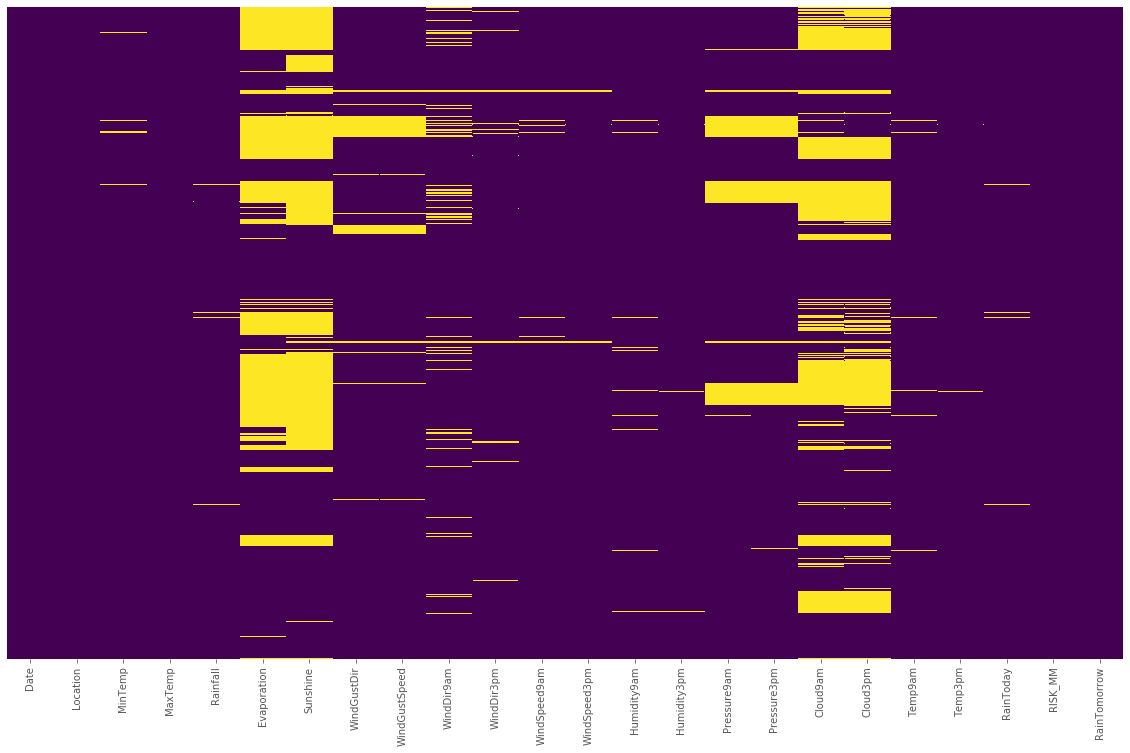

In [478]:
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [479]:
df["Evaporation"].isnull().sum()

28049

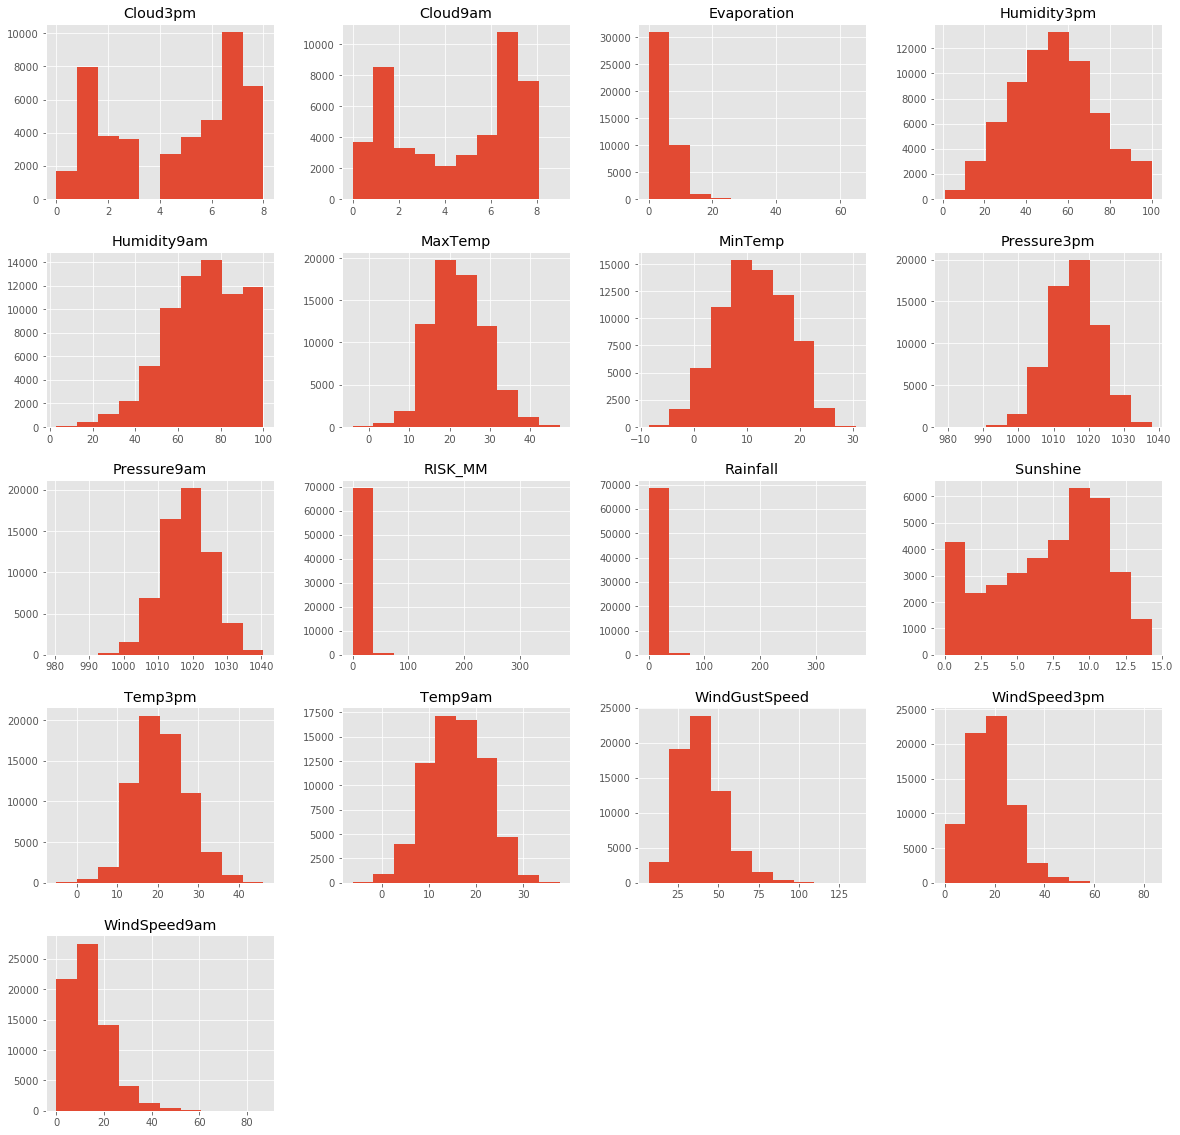

In [480]:
df[real_vars].hist(figsize=(20, 20));

# Препроцесинг

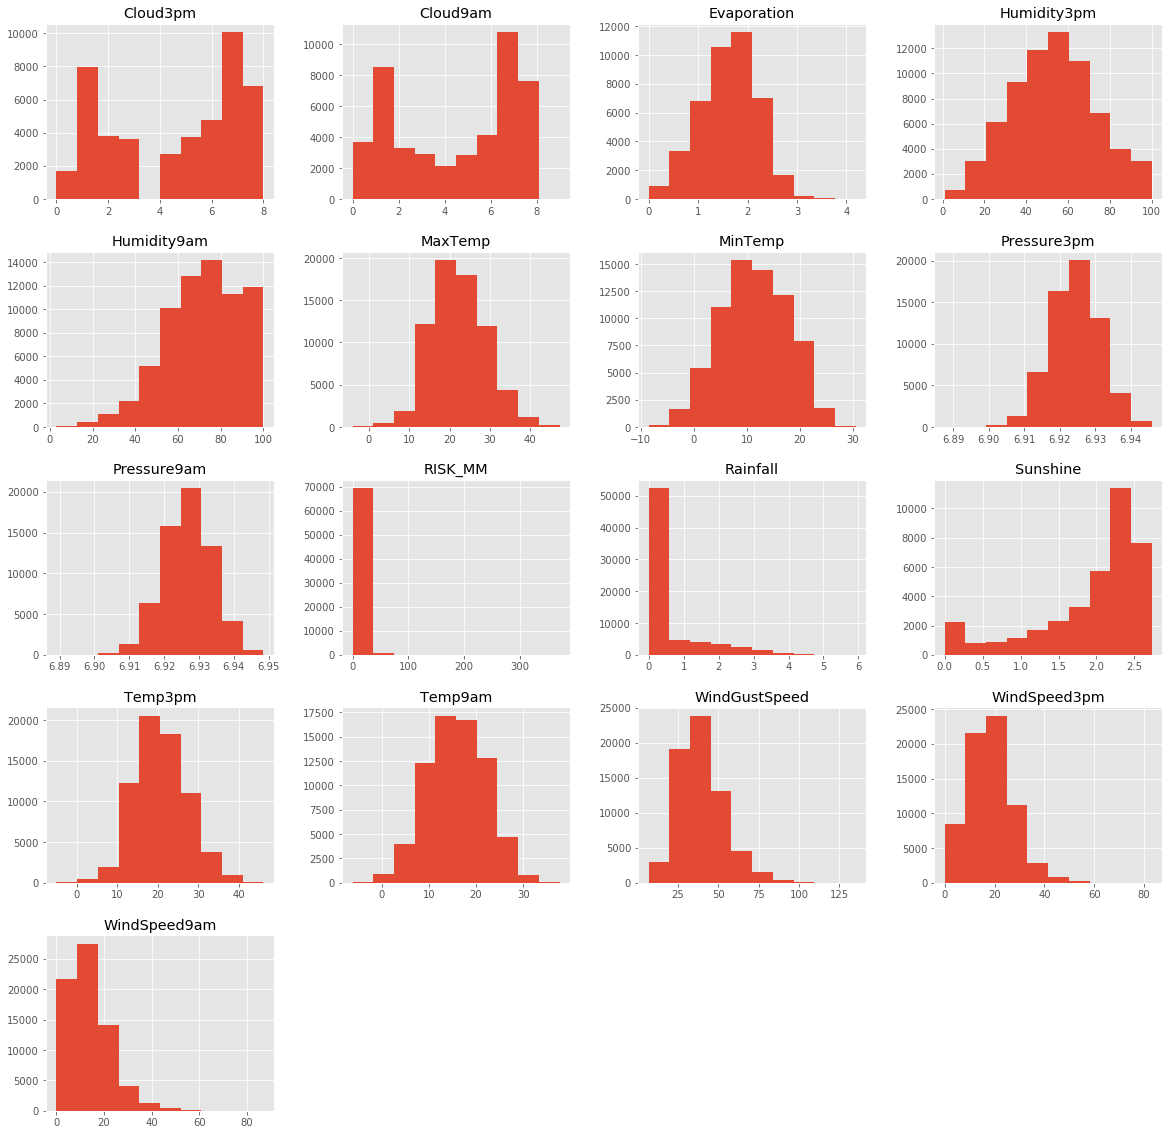

In [481]:
#Логорифмировать
vars_to_log = ["Rainfall", "Evaporation", "Sunshine", "Pressure3pm", "Pressure9am"]
df[vars_to_log] = df[vars_to_log].apply(lambda w: np.log(w + 1))
real_vars_hist = df[real_vars].hist(figsize=(20, 20))
#Пожать категориальные 

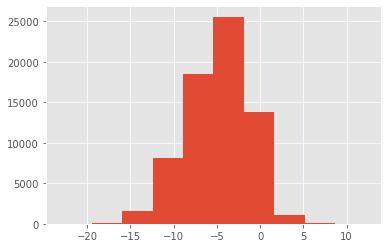

In [482]:
(df["Temp9am"] - df["Temp3pm"]).hist()

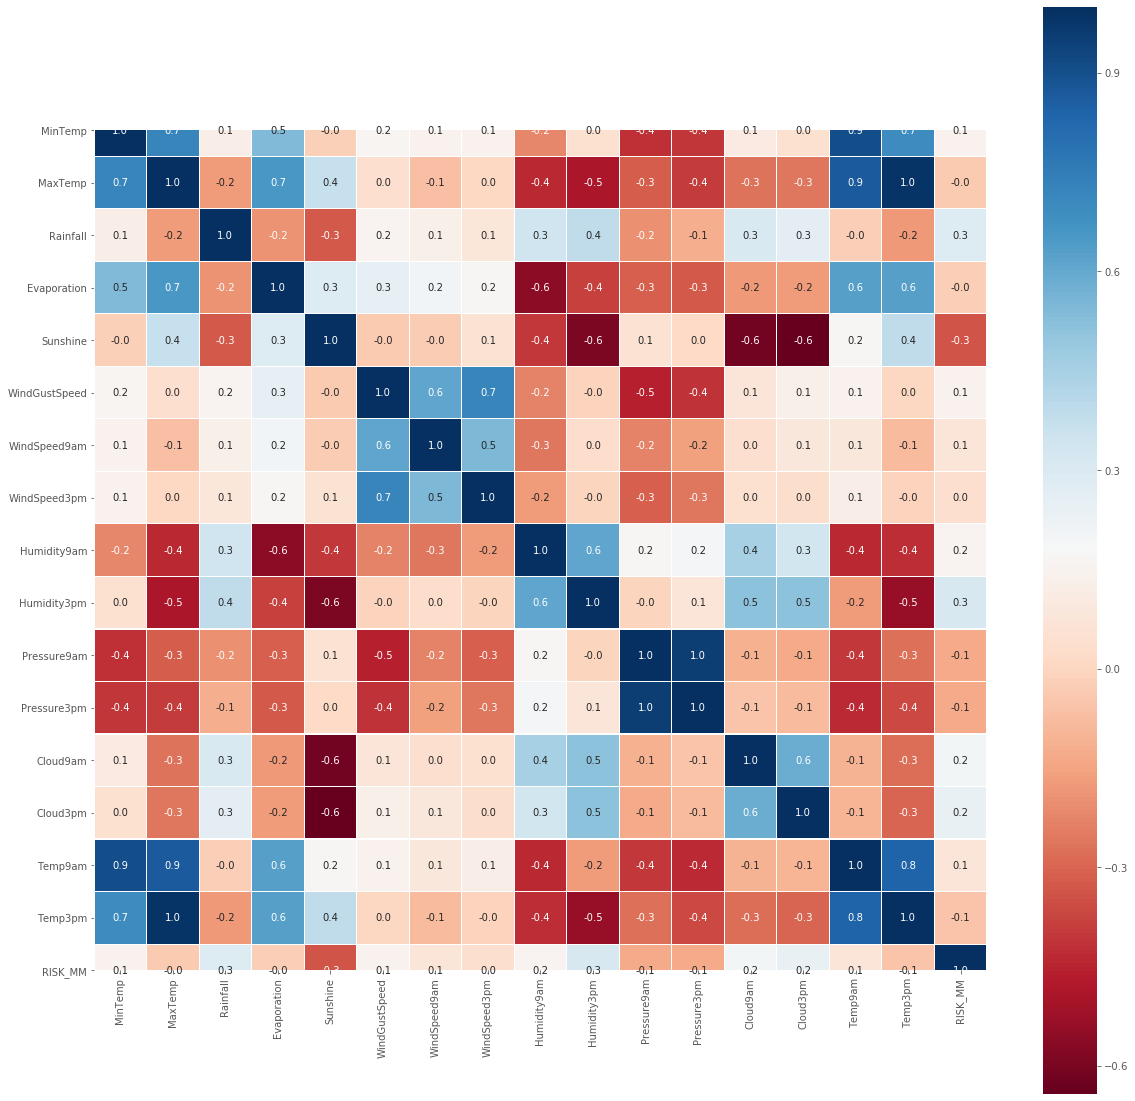

In [483]:
plt.figure(figsize=(20,20))
corr = df.corr() 
sns.heatmap(corr, annot=True, square=True, fmt=".1f", linewidths=0.1, cmap="RdBu");

## Scatter coor to RISK_MM

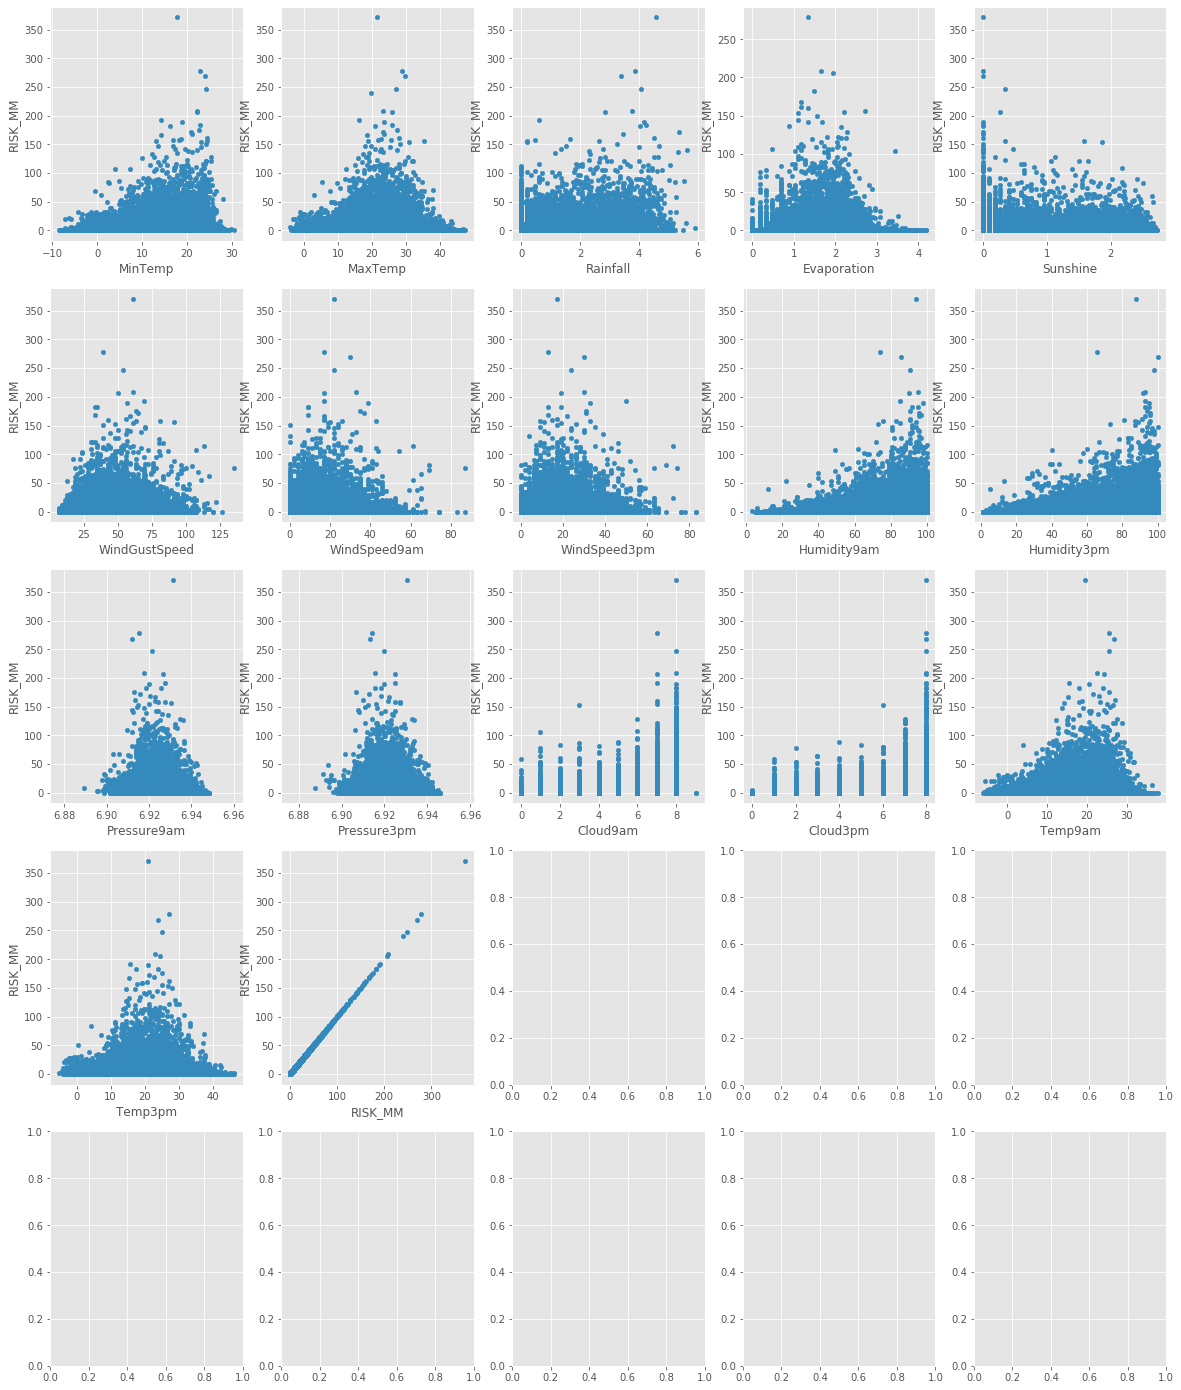

In [484]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 25))

for i, feature in enumerate(df[real_vars]):
    df.plot(feature, "RISK_MM", subplots=True, kind="scatter", ax=axes[i // 5, i % 5])

# Feature extracting

## Temperature delta

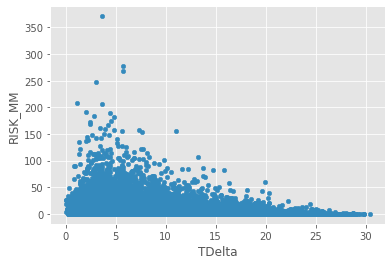

In [485]:
df["TDelta"] = (df["MinTemp"] - df["MaxTemp"]).apply(abs)
df
df.plot("TDelta", "RISK_MM", kind="scatter")

## PressureDelta

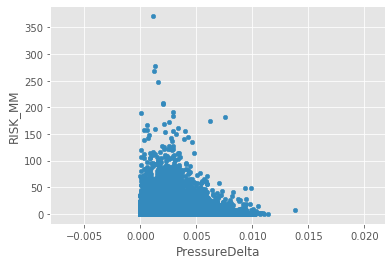

In [486]:
df["PressureDelta"] = (df["Pressure9am"] - df["Pressure3pm"]).apply(abs)
df
df.plot("PressureDelta", "RISK_MM", kind="scatter")

## Season

In [487]:
df["Month"] = df["Date"].apply(str).apply(lambda x: x[5:7]).apply(int)
df["Month"]

0        12
1        12
2        12
3        12
4        12
         ..
70235     9
70236     9
70237     9
70238     9
70239     9
Name: Month, Length: 70240, dtype: int64

In [488]:
def monthToSeason(month):
    return month // 4
df["Season"] = df["Month"].apply(monthToSeason)
df["Season"]

0        3
1        3
2        3
3        3
4        3
        ..
70235    2
70236    2
70237    2
70238    2
70239    2
Name: Season, Length: 70240, dtype: int64

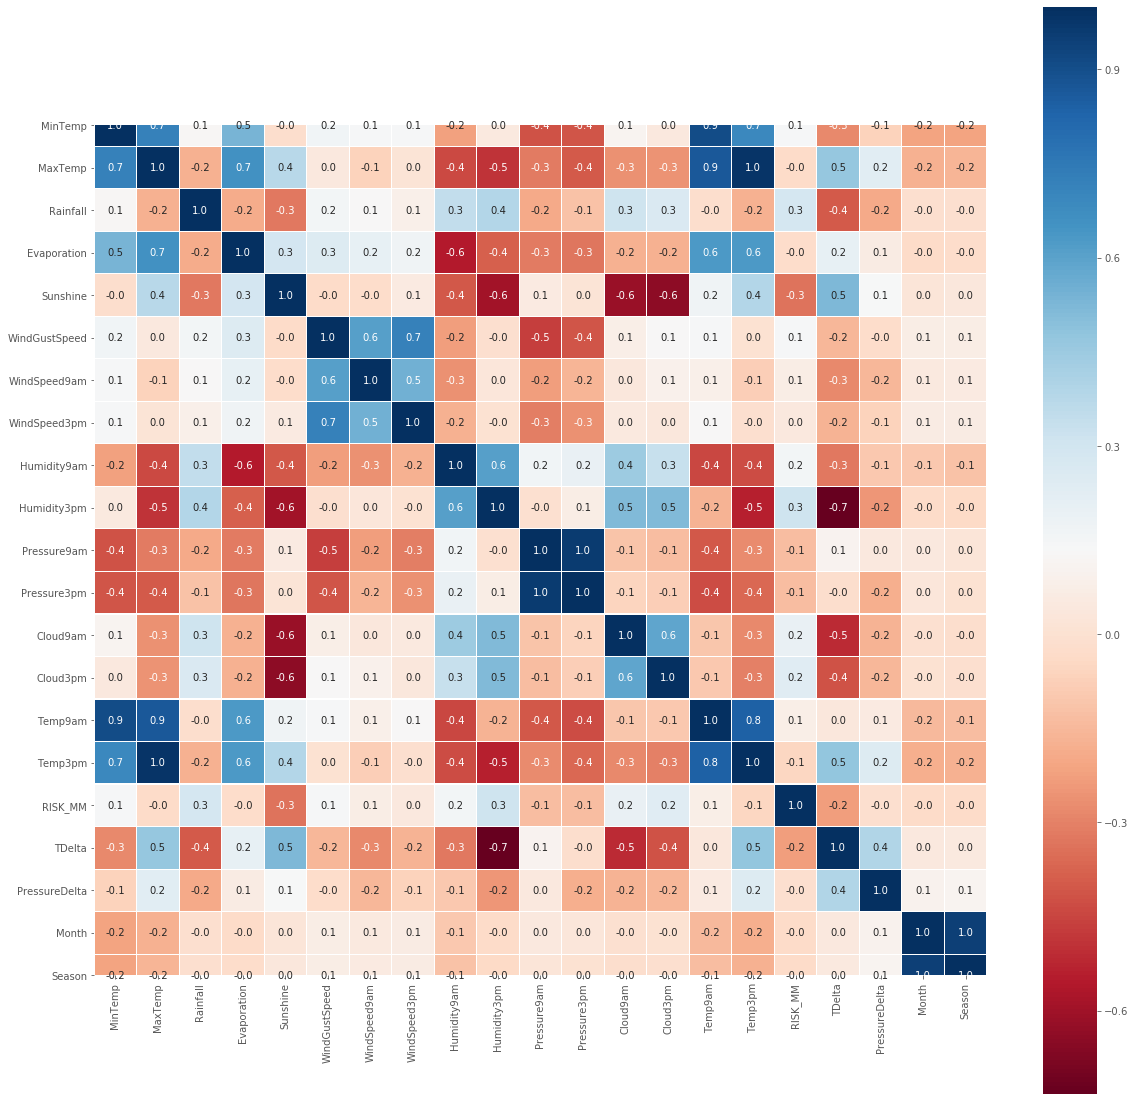

In [489]:
plt.figure(figsize=(20,20))
corr = df.corr() 
sns.heatmap(corr, annot=True, square=True, fmt=".1f", linewidths=0.1, cmap="RdBu");

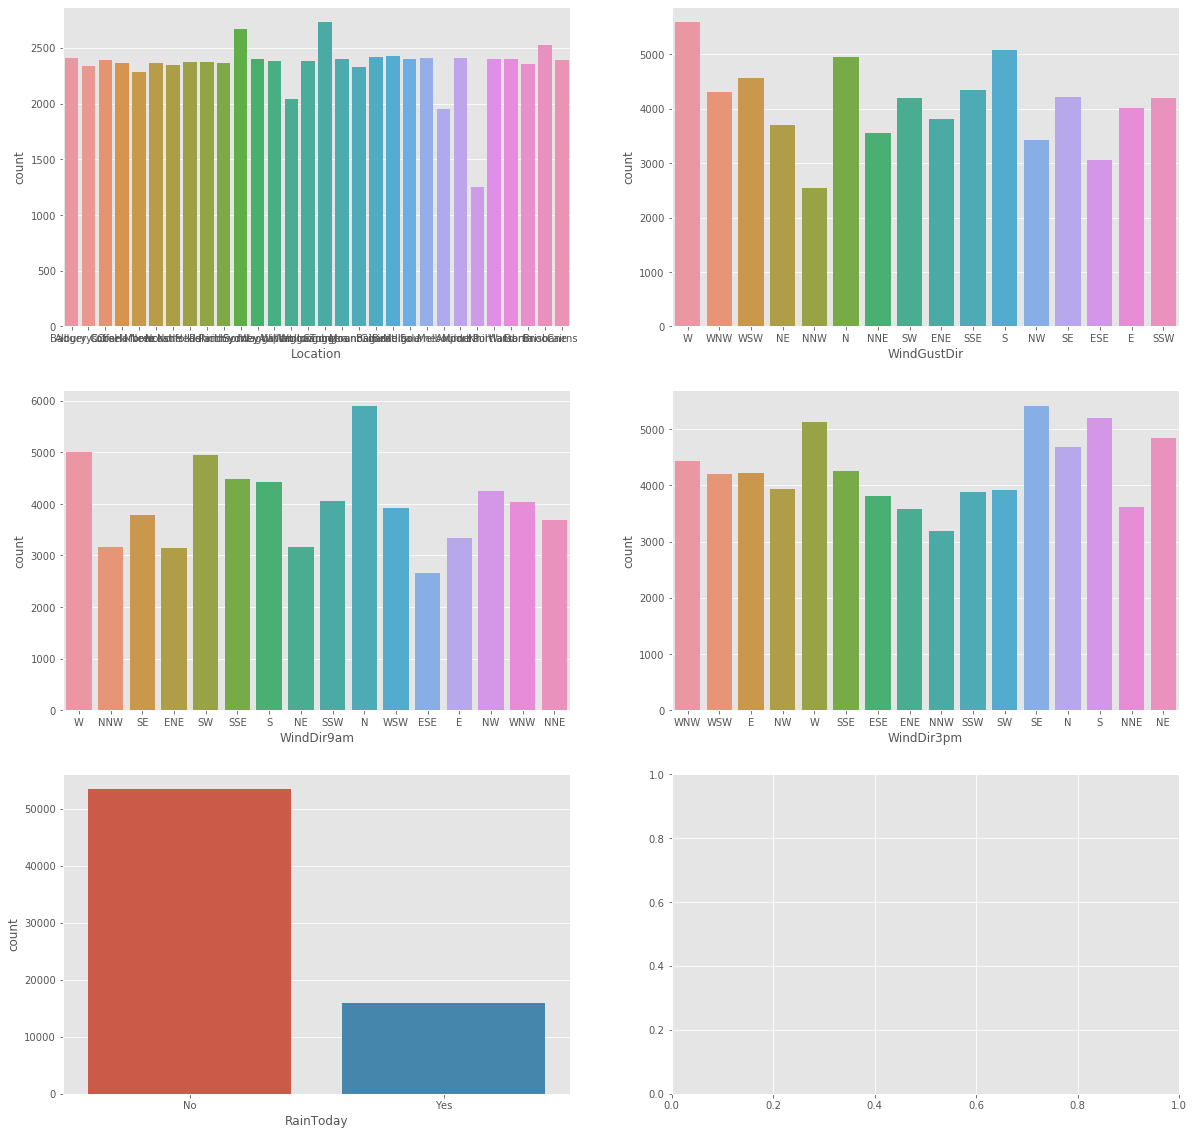

In [490]:
fig, axes = plt.subplots(3,2, figsize=(20, 20))

for i in range(len(cat_vars)):
    sns.countplot(x = cat_vars[i], data = df, ax = axes[i // 2, i % 2])

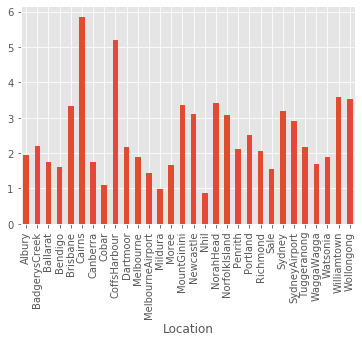

In [491]:
df.groupby("Location").describe()["RISK_MM"]["mean"].plot.bar()

## Интересный признак)

1.2      795
1.4      699
1.5        4
1.6      615
1.7        1
        ... 
240.0      1
247.2      1
268.6      1
278.4      1
371.0      1
Name: RISK_MM, Length: 514, dtype: int64


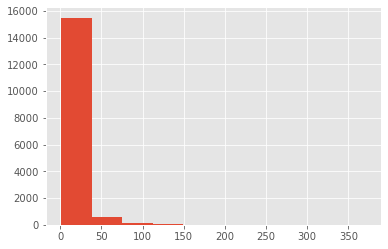

In [492]:
print(df[df[label] == "Yes"]["RISK_MM"].value_counts().sort_index())
print(df[df[label] == "No"]["RISK_MM"].value_counts().sort_index())

## Обработаем пропущенные значения
Как будем заполнять? Самый простой вариант, заполнить либо нулями, либо средними, медианными и т.д. значениями. Но очевидно, что влажность, кол-во солнечных дней, облачность - зависят от климматического пояса, и и имеют большую корреляцию, с этим же параметром, в этой же локации, но в предыдущем году

In [505]:
import math
def fixByLocationAndMonth(feature, df):
    evaporationsLM = df[df[feature].isnull() == False].groupby(["Location", "Month"]).describe()[feature]["mean"]
    na_evaporation = df[df[feature].isnull()]

    def FillNAEvaporation(x):
        if (math.isnan(x[feature])):
            try:
                return evaporationsLM[(x["Location"], x["Month"])]
            except:
                try:
                    return evaporationsLM[x["Location"]].mean()
                except:
                    return df[feature].mean()
        else:
            return x[feature]
        
    df[feature] = df.apply(FillNAEvaporation, axis = 1)
    
fixByLocationAndMonth("Evaporation", df)
fixByLocationAndMonth("Sunshine", df)
fixByLocationAndMonth("Cloud9am", df)
fixByLocationAndMonth("Cloud3pm", df)

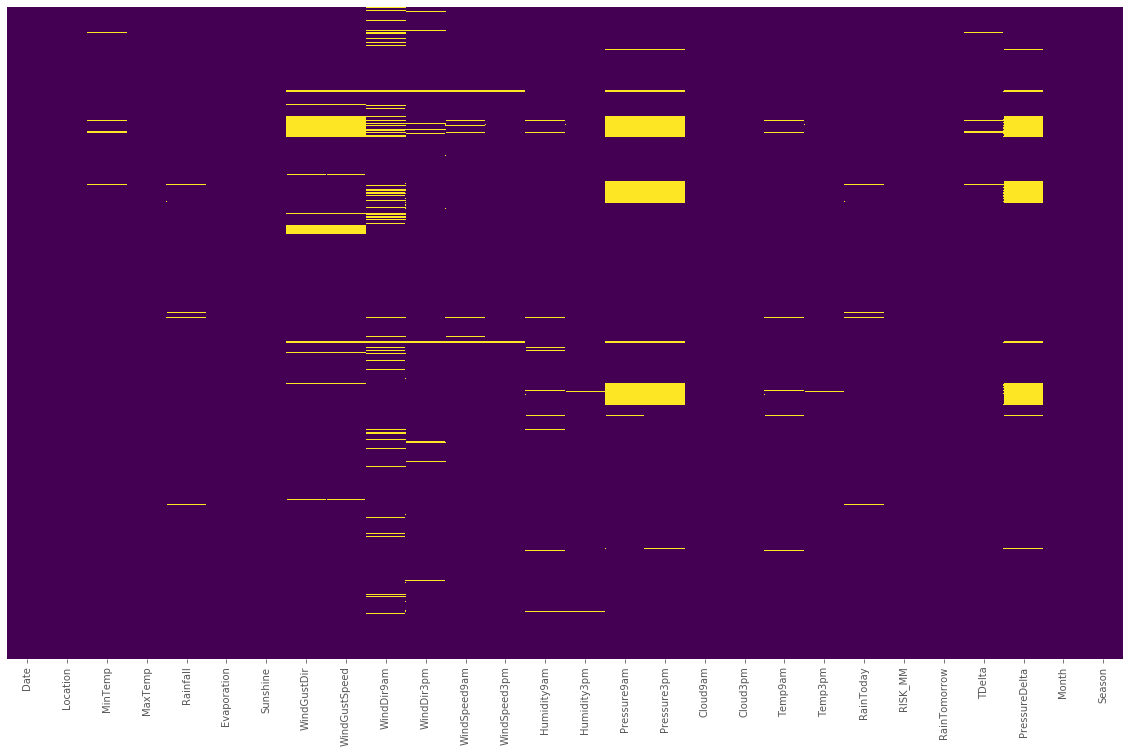

In [506]:
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Удалим некоторые переменные

In [500]:
data = df.copy()
real_vars.append("TDelta")
real_vars.append("PressureDelta")
print(real_vars)
data[real_vars] = data[real_vars].fillna(0)

to_drop = ["Date", "RISK_MM", "Season", "WindDir9am", "WindDir3pm", "WindGustDir"]
data = data.drop(columns = to_drop)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM', 'TDelta', 'PressureDelta']


## one-hot encoding 

In [501]:
data = pd.get_dummies(data, columns = ["Location", "RainToday", "Month"], dummy_na=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70240 entries, 0 to 70239
Data columns (total 66 columns):
MinTemp                      70240 non-null float64
MaxTemp                      70240 non-null float64
Rainfall                     70240 non-null float64
Evaporation                  70240 non-null float64
Sunshine                     70240 non-null float64
WindGustSpeed                70240 non-null float64
WindSpeed9am                 70240 non-null float64
WindSpeed3pm                 70240 non-null float64
Humidity9am                  70240 non-null float64
Humidity3pm                  70240 non-null float64
Pressure9am                  70240 non-null float64
Pressure3pm                  70240 non-null float64
Cloud9am                     70240 non-null float64
Cloud3pm                     70240 non-null float64
Temp9am                      70240 non-null float64
Temp3pm                      70240 non-null float64
RainTomorrow                 70240 non-null object
TDelta  

In [502]:
data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Month_4.0,Month_5.0,Month_6.0,Month_7.0,Month_8.0,Month_9.0,Month_10.0,Month_11.0,Month_12.0,Month_nan
0,13.4,22.9,0.470004,1.618071,1.925790,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.000000,1.618071,1.925790,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,1,0
2,12.9,25.7,0.000000,1.618071,1.925790,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,1,0
3,9.2,28.0,0.000000,1.618071,1.925790,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,1,0
4,17.5,32.3,0.693147,1.618071,1.925790,41.0,7.0,20.0,82.0,33.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70235,19.2,29.1,0.000000,2.021454,2.250715,52.0,22.0,37.0,61.0,56.0,...,0,0,0,0,0,1,0,0,0,0
70236,20.0,28.2,2.219203,2.021454,2.250715,50.0,20.0,31.0,75.0,62.0,...,0,0,0,0,0,1,0,0,0,0
70237,19.8,29.1,0.000000,2.021454,2.250715,41.0,24.0,31.0,62.0,54.0,...,0,0,0,0,0,1,0,0,0,0
70238,18.8,28.3,1.481605,2.021454,2.250715,33.0,17.0,24.0,69.0,44.0,...,0,0,0,0,0,1,0,0,0,0


## export to csv

In [503]:
data.to_csv("training_prepared.csv")